In [1]:
#positive wordとnegative wordの数で判別
def find_sentiment(sentence, pos, neg): 
    """ 
    This function returns sentiment of sentence 
    :param sentence: sentence, a string 
    :param pos: set of positive words 
    :param neg: set of negative words 
    :return: returns positive, negative or neutral sentiment 
    """ 
     
    # split sentence by a space 
    # "this is a sentence!" becomes: 
    # ["this", "is" "a", "sentence!"] 
    # note that im splitting on all whitespaces 
    # if you want to split by space use .split(" ") 
    sentence = sentence.split() 
     
    # make sentence into a set 
    sentence = set(sentence) 
     
    # check number of common words with positive 
    num_common_pos = len(sentence.intersection(pos)) 
     
    # check number of common words with negative 
    num_common_neg = len(sentence.intersection(neg)) 
     
    # make conditions and return 
    # see how return used eliminates if else 
    if num_common_pos > num_common_neg: 
        return "positive" 
    if num_common_pos < num_common_neg: 
        return "negative" 
    return "neutral" 

In [2]:
from nltk.tokenize import word_tokenize 

In [3]:
sentence = "hi, how are you?" 

In [4]:
#これだと記号も含まれてしまう
sentence.split() 

['hi,', 'how', 'are', 'you?']

In [1]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer 
 
# create a corpus of sentences 
corpus = [ 
    "hello, how are you?", 
    "im getting bored at home. And you? What do you think?", 
    "did you know about counts", 
    "let's see if this works!", 
    "YES!!!!" 
] 
 
# initialize CountVectorizer 
ctv = CountVectorizer() 
 
# fit the vectorizer on corpus 
ctv.fit(corpus) 
 
corpus_transformed = ctv.transform(corpus) 

In [2]:
print(corpus_transformed)

  (0, 2)	1
  (0, 9)	1
  (0, 11)	1
  (0, 22)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 7)	1
  (1, 8)	1
  (1, 10)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 22)	2
  (2, 0)	1
  (2, 5)	1
  (2, 6)	1
  (2, 14)	1
  (2, 22)	1
  (3, 12)	1
  (3, 15)	1
  (3, 16)	1
  (3, 18)	1
  (3, 20)	1
  (4, 21)	1


In [3]:
print(ctv.vocabulary_) 

{'hello': 9, 'how': 11, 'are': 2, 'you': 22, 'im': 13, 'getting': 8, 'bored': 4, 'at': 3, 'home': 10, 'and': 1, 'what': 19, 'do': 7, 'think': 17, 'did': 6, 'know': 14, 'about': 0, 'counts': 5, 'let': 15, 'see': 16, 'if': 12, 'this': 18, 'works': 20, 'yes': 21}


In [4]:
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.tokenize import word_tokenize 
 
 
# create a corpus of sentences 
corpus = [ 
    "hello, how are you?", 
    "im getting bored at home. And you? What do you think?", 
    "did you know about counts", 
    "let's see if this works!", 
    "YES!!!!" 
] 
 
# initialize CountVectorizer with word_tokenize from nltk 
# as the tokenizer 
ctv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None) 
 
# fit the vectorizer on corpus 
ctv.fit(corpus) 
 
corpus_transformed = ctv.transform(corpus) 
print(ctv.vocabulary_) 


{'hello': 14, ',': 2, 'how': 16, 'are': 7, 'you': 27, '?': 4, 'im': 18, 'getting': 13, 'bored': 9, 'at': 8, 'home': 15, '.': 3, 'and': 6, 'what': 24, 'do': 12, 'think': 22, 'did': 11, 'know': 19, 'about': 5, 'counts': 10, 'let': 20, "'s": 1, 'see': 21, 'if': 17, 'this': 23, 'works': 25, '!': 0, 'yes': 26}


In [63]:
%%time
#LR
# import what we need 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import CountVectorizer 
 
 
if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
     
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 
 
    # we go over the folds created 
    for fold_ in range(5): 
        # temporary dataframes for train and test 
        train_df = df[df.kfold != fold_].reset_index(drop=True) 
        test_df = df[df.kfold == fold_].reset_index(drop=True) 
 
        # initialize CountVectorizer with NLTK's word_tokenize 
        # function as tokenizer 
        count_vec = CountVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None 
        ) 
 
        # fit count_vec on training data reviews 
        count_vec.fit(train_df.review) 
 
        # transform training and validation data reviews 
        xtrain = count_vec.transform(train_df.review) 
        xtest = count_vec.transform(test_df.review) 
 
        # initialize logistic regression model 
        model = linear_model.LogisticRegression() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, train_df.sentiment) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(test_df.sentiment, preds) 
 
        print(f"Fold: {fold_}") 
        print(f"Accuracy = {accuracy}") 
        print("")

/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 0
Accuracy = 0.8893



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 1
Accuracy = 0.8946



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 2
Accuracy = 0.8849



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 3
Accuracy = 0.8943

Fold: 4
Accuracy = 0.8919

CPU times: user 18min 12s, sys: 9.58 s, total: 18min 22s
Wall time: 18min 38s


/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
%%time
#NB
# import what we need 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import naive_bayes 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import CountVectorizer 
 
if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
     
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 
 
    # we go over the folds created 
    for fold_ in range(5): 
        # temporary dataframes for train and test 
        train_df = df[df.kfold != fold_].reset_index(drop=True) 
        test_df = df[df.kfold == fold_].reset_index(drop=True) 
 
        # initialize CountVectorizer with NLTK's word_tokenize 
        # function as tokenizer 
        count_vec = CountVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None 
        ) 
 
        # fit count_vec on training data reviews 
        count_vec.fit(train_df.review) 
 
        # transform training and validation data reviews 
        xtrain = count_vec.transform(train_df.review) 
        xtest = count_vec.transform(test_df.review) 
 
        # initialize logistic regression model 
        model = naive_bayes.MultinomialNB() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, train_df.sentiment) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(test_df.sentiment, preds) 
 
        print(f"Fold: {fold_}") 
        print(f"Accuracy = {accuracy}") 
        print("")

Fold: 0
Accuracy = 0.846

Fold: 1
Accuracy = 0.8452

Fold: 2
Accuracy = 0.8415

Fold: 3
Accuracy = 0.8403

Fold: 4
Accuracy = 0.8447

CPU times: user 13min 39s, sys: 3.58 s, total: 13min 42s
Wall time: 13min 44s


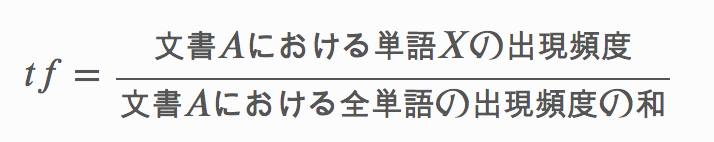

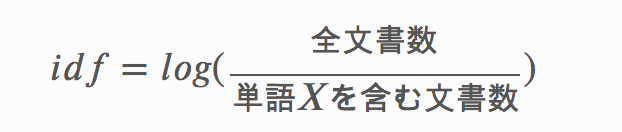

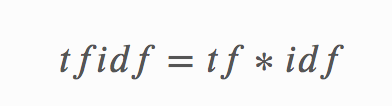

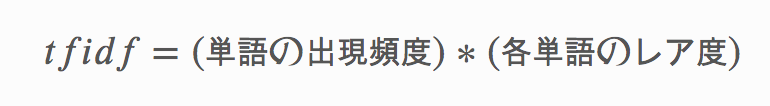

In [11]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.tokenize import word_tokenize 
 
# create a corpus of sentences 
corpus = [     
    "hello, how are you?", 
    "im getting bored at home. And you? What do you think?", 
    "did you know about counts", 
    "let's see if this works!", 
    "YES!!!!" 
] 
 
# initialize TfidfVectorizer with word_tokenize from nltk 
# as the tokenizer 
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None) 
 
# fit the vectorizer on corpus 
tfv.fit(corpus) 
 
corpus_transformed = tfv.transform(corpus) 
print(corpus_transformed) 

  (0, 27)	0.2965698850220162
  (0, 16)	0.4428321995085722
  (0, 14)	0.4428321995085722
  (0, 7)	0.4428321995085722
  (0, 4)	0.35727423026525224
  (0, 2)	0.4428321995085722
  (1, 27)	0.35299699146792735
  (1, 24)	0.2635440111190765
  (1, 22)	0.2635440111190765
  (1, 18)	0.2635440111190765
  (1, 15)	0.2635440111190765
  (1, 13)	0.2635440111190765
  (1, 12)	0.2635440111190765
  (1, 9)	0.2635440111190765
  (1, 8)	0.2635440111190765
  (1, 6)	0.2635440111190765
  (1, 4)	0.42525129752567803
  (1, 3)	0.2635440111190765
  (2, 27)	0.31752680284846835
  (2, 19)	0.4741246485558491
  (2, 11)	0.4741246485558491
  (2, 10)	0.4741246485558491
  (2, 5)	0.4741246485558491
  (3, 25)	0.38775666010579296
  (3, 23)	0.38775666010579296
  (3, 21)	0.38775666010579296
  (3, 20)	0.38775666010579296
  (3, 17)	0.38775666010579296
  (3, 1)	0.38775666010579296
  (3, 0)	0.3128396318588854
  (4, 26)	0.2959842226518677
  (4, 0)	0.9551928286692534


In [61]:
%%time
# import what we need 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import TfidfVectorizer 

if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
     
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 


    # we go over the folds created 
    for fold_ in range(5): 
        # temporary dataframes for train and test 
        train_df = df[df.kfold != fold_].reset_index(drop=True) 
        test_df = df[df.kfold == fold_].reset_index(drop=True) 
 
        # initialize TfidfVectorizer with NLTK's word_tokenize 
        # function as tokenizer 
        tfidf_vec = TfidfVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None 
        ) 
 
        # fit tfidf_vec on training data reviews 
        tfidf_vec.fit(train_df.review) 
 
        # transform training and validation data reviews 
        xtrain = tfidf_vec.transform(train_df.review) 
        xtest = tfidf_vec.transform(test_df.review) 
 
        # initialize logistic regression model 
        model = linear_model.LogisticRegression() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, train_df.sentiment) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(test_df.sentiment, preds) 
 
        print(f"Fold: {fold_}") 
        print(f"Accuracy = {accuracy}") 
        print("")

Fold: 0
Accuracy = 0.8949

Fold: 1
Accuracy = 0.8971



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 2
Accuracy = 0.8969



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 3
Accuracy = 0.9014

Fold: 4
Accuracy = 0.8932

CPU times: user 15min 52s, sys: 8.12 s, total: 16min
Wall time: 16min 7s


In [62]:
%%time
# import what we need 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import naive_bayes 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import TfidfVectorizer 

if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
     
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 


    # we go over the folds created 
    for fold_ in range(5): 
        # temporary dataframes for train and test 
        train_df = df[df.kfold != fold_].reset_index(drop=True) 
        test_df = df[df.kfold == fold_].reset_index(drop=True) 
 
        # initialize TfidfVectorizer with NLTK's word_tokenize 
        # function as tokenizer 
        tfidf_vec = TfidfVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None 
        ) 
 
        # fit tfidf_vec on training data reviews 
        tfidf_vec.fit(train_df.review) 
 
        # transform training and validation data reviews 
        xtrain = tfidf_vec.transform(train_df.review) 
        xtest = tfidf_vec.transform(test_df.review) 
 
        # initialize naive bayes model 
        model = naive_bayes.MultinomialNB() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, train_df.sentiment) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(test_df.sentiment, preds) 
 
        print(f"Fold: {fold_}") 
        print(f"Accuracy = {accuracy}") 
        print("")

Fold: 0
Accuracy = 0.862

Fold: 1
Accuracy = 0.8659

Fold: 2
Accuracy = 0.8631

Fold: 3
Accuracy = 0.8651

Fold: 4
Accuracy = 0.8669

CPU times: user 19min 58s, sys: 13 s, total: 20min 11s
Wall time: 20min 32s


In [65]:
from nltk import ngrams 
from nltk.tokenize import word_tokenize 
 
# let's see 3 grams 
N = 3 
# input sentence 
sentence = "hi, how are you?" 
# tokenized sentence 
tokenized_sentence = word_tokenize(sentence) 
# generate n_grams 
n_grams = list(ngrams(tokenized_sentence, N)) 
print(n_grams) 

[('hi', ',', 'how'), (',', 'how', 'are'), ('how', 'are', 'you'), ('are', 'you', '?')]


In [66]:
tfidf_vec = TfidfVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None, 
            ngram_range=(1, 3) 
        ) 

In [68]:
%%time
# import what we need 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import TfidfVectorizer 

if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
     
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 


    # we go over the folds created 
    for fold_ in range(5): 
        # temporary dataframes for train and test 
        train_df = df[df.kfold != fold_].reset_index(drop=True) 
        test_df = df[df.kfold == fold_].reset_index(drop=True) 
 
        # initialize TfidfVectorizer with NLTK's word_tokenize 
        # function as tokenizer 
        tfidf_vec = TfidfVectorizer( 
            tokenizer=word_tokenize, 
            token_pattern=None, 
            ngram_range=(1, 3) 
        ) 
 
        # fit tfidf_vec on training data reviews 
        tfidf_vec.fit(train_df.review) 
 
        # transform training and validation data reviews 
        xtrain = tfidf_vec.transform(train_df.review) 
        xtest = tfidf_vec.transform(test_df.review) 
 
        # initialize logistic regression model 
        model = linear_model.LogisticRegression() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, train_df.sentiment) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(test_df.sentiment, preds) 
 
        print(f"Fold: {fold_}") 
        print(f"Accuracy = {accuracy}") 
        print("")

/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 0
Accuracy = 0.8913



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 1
Accuracy = 0.8912



/opt/anaconda3/envs/a/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold: 2
Accuracy = 0.8914

Fold: 3
Accuracy = 0.8968

Fold: 4
Accuracy = 0.8929

CPU times: user 32min 3s, sys: 49.2 s, total: 32min 52s
Wall time: 33min 4s


In [15]:
#stemming, lemmatization(原形に戻す)
from nltk.stem import WordNetLemmatizer  
from nltk.stem.snowball import SnowballStemmer 
 
# initialize lemmatizer 
lemmatizer = WordNetLemmatizer() 

# initialize stemmer 
stemmer = SnowballStemmer("english") 
 
words = ["fishing", "fishes", "fished"] 
 
for word in words: 
    print(f"word={word}") 
    print(f"stemmed_word={stemmer.stem(word)}") 
    print(f"lemma={lemmatizer.lemmatize(word)}") 
    print("") 

word=fishing
stemmed_word=fish
lemma=fishing

word=fishes
stemmed_word=fish
lemma=fish

word=fished
stemmed_word=fish
lemma=fished



In [17]:
#次元圧縮。意味を成してない。
import pandas as pd 
from nltk.tokenize import word_tokenize 
from sklearn import decomposition 
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# create a corpus of sentences 
# we read only 10k samples from training data 
# for this example 
corpus = pd.read_csv("IMDB Dataset.csv", nrows=10000) 
corpus = corpus.review.values 
 
# initialize TfidfVectorizer with word_tokenize from nltk 
# as the tokenizer 
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None) 
 
# fit the vectorizer on corpus 
tfv.fit(corpus) 
 
# transform the corpus using tfidf 
corpus_transformed = tfv.transform(corpus) 
 
# initialize SVD with 10 components 
svd = decomposition.TruncatedSVD(n_components=10) 
 
# fit SVD 
corpus_svd = svd.fit(corpus_transformed) 
 
# choose first sample and create a dictionary 
# of feature names and their scores from svd 
# you can change the sample_index variable to 
# get dictionary for any other sample 
sample_index = 0 
feature_scores = dict( 
    zip( 
        tfv.get_feature_names(), 
        corpus_svd.components_[sample_index] 
    ) 
) 
 
# once we have the dictionary, we can now 
# sort it in decreasing order and get the  
# top N topics 
N = 5 
print(sorted(feature_scores, key=feature_scores.get, reverse=True)[:N]) 

['the', ',', '.', 'a', 'and']


In [18]:
N = 5 
 
for sample_index in range(5): 
    feature_scores = dict( 
        zip( 
            tfv.get_feature_names(), 
            corpus_svd.components_[sample_index] 
        ) 
    ) 
    print( 
        sorted( 
            feature_scores,  
            key=feature_scores.get,  
            reverse=True 
        )[:N] 
    ) 


['the', ',', '.', 'a', 'and']
['br', '<', '>', '/', '-']
['i', 'movie', '!', 'it', 'was']
[',', '!', "''", '``', 'you']
['!', 'the', "''", '``', '...']


In [19]:
import re 
import string 
 
def clean_text(s): 
    """ 
    This function cleans the text a bit 
    :param s: string 
    :return: cleaned string 
    """ 
    # split by all whitespaces 
    s = s.split() 
     
    # join tokens by single space 
    # why we do this? 
    # this will remove all kinds of weird space 
    # "hi.   how are you" becomes 
    # "hi. how are you" 
    s = " ".join(s) 
     
    # remove all punctuations using regex and string module 
    s = re.sub(f'[{re.escape(string.punctuation)}]', '', s) 
     
    # you can add more cleaning here if you want 
    # and then return the cleaned string 
    return s 

In [72]:
import pandas as pd 
from nltk.tokenize import word_tokenize 
from sklearn import decomposition 
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# create a corpus of sentences 
# we read only 10k samples from training data 
# for this example 
corpus = pd.read_csv("IMDB Dataset.csv", nrows=10000) 
corpus.loc[:, "review"] = corpus.review.apply(clean_text)
corpus = corpus.review.values
 
# initialize TfidfVectorizer with word_tokenize from nltk 
# as the tokenizer 
tfv = TfidfVectorizer(tokenizer=word_tokenize, token_pattern=None) 
 
# fit the vectorizer on corpus 
tfv.fit(corpus) 
 
# transform the corpus using tfidf 
corpus_transformed = tfv.transform(corpus) 
 
# initialize SVD with 10 components 
svd = decomposition.TruncatedSVD(n_components=10) 
 
# fit SVD 
corpus_svd = svd.fit(corpus_transformed) 
 
# choose first sample and create a dictionary 
# of feature names and their scores from svd 
# you can change the sample_index variable to 
# get dictionary for any other sample 
sample_index = 0 
feature_scores = dict( 
    zip( 
        tfv.get_feature_names(), 
        corpus_svd.components_[sample_index] 
    ) 
) 
 
# once we have the dictionary, we can now 
# sort it in decreasing order and get the  
# top N topics 
N = 5 
print(sorted(feature_scores, key=feature_scores.get, reverse=True)[:N]) 

['the', 'a', 'and', 'of', 'to']


In [73]:
N = 5 
 
for sample_index in range(5): 
    feature_scores = dict( 
        zip( 
            tfv.get_feature_names(), 
            corpus_svd.components_[sample_index] 
        ) 
    ) 
    print( 
        sorted( 
            feature_scores,  
            key=feature_scores.get,  
            reverse=True 
        )[:N] 
    ) 

['the', 'a', 'and', 'of', 'to']
['i', 'movie', 'it', 'was', 'this']
['the', 'was', 'i', 'were', 'of']
['her', 'was', 'she', 'i', 'he']
['br', 'to', 'they', 'he', 'show']


###### さっきよりはマシだが、まだまだ。ストップワード（頻出ワード）を削除することで対処できる。

### 深層学習

In [21]:
import numpy as np 
 
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer): 
    """ 
    Given a sentence and other information, 
    this function returns embedding for the whole sentence 
    :param s: sentence, string 
    :param embedding_dict: dictionary word:vector 
    :param stop_words: list of stop words, if any 
    :param tokenizer: a tokenization function 
    """ 
    # convert sentence to string and lowercase it 
    words = str(s).lower() 
     
    # tokenize the sentence 
    words = tokenizer(words) 
     
    # remove stop word tokens 
    words = [w for w in words if not w in stop_words] 
     
    # keep only alpha-numeric tokens 
    words = [w for w in words if w.isalpha()] 
     
    # initialize empty list to store embeddings 
    M = [] 
    for w in words: 
        # for evert word, fetch the embedding from 
        # the dictionary and append to list of  
        # embeddings 
        if w in embedding_dict: 
            M.append(embedding_dict[w]) 
     
    # if we dont have any vectors, return zeros 
    if len(M) == 0: 
        return np.zeros(300) 
 
    # convert list of embeddings to array 
    M = np.array(M) 
     
    # calculate sum over axis=0 
    v = M.sum(axis=0) 
    # return normalized vector 
    return v / np.sqrt((v ** 2).sum()) 


In [22]:
# fasttext.py 
 
import io 
import numpy as np 
import pandas as pd 
 
from nltk.tokenize import word_tokenize 
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import model_selection 
from sklearn.feature_extraction.text import TfidfVectorizer 
 
def load_vectors(fname): 
    # taken from: https://fasttext.cc/docs/en/english-vectors.html 
    fin = io.open( 
              fname,  
              'r',  
              encoding='utf-8',  
              newline='\n',  
              errors='ignore' 
    ) 
    n, d = map(int, fin.readline().split()) 
    data = {} 
    for line in fin: 
        tokens = line.rstrip().split(' ') 
        data[tokens[0]] = list(map(float, tokens[1:])) 
    return data 
 
def sentence_to_vec(s, embedding_dict, stop_words, tokenizer): 
    """ 
    Given a sentence and other information, 
    this function returns embedding for the whole sentence 
    :param s: sentence, string 
    :param embedding_dict: dictionary word:vector 
    :param stop_words: list of stop words, if any 
    :param tokenizer: a tokenization function 
    """ 
    # convert sentence to string and lowercase it 
    words = str(s).lower() 
     
    # tokenize the sentence 
    words = tokenizer(words) 
     
    # remove stop word tokens 
    words = [w for w in words if not w in stop_words] 
     
    # keep only alpha-numeric tokens 
    words = [w for w in words if w.isalpha()] 
     
    # initialize empty list to store embeddings 
    M = [] 
    for w in words: 
        # for evert word, fetch the embedding from 
        # the dictionary and append to list of  
        # embeddings 
        if w in embedding_dict: 
            M.append(embedding_dict[w]) 
     
    # if we dont have any vectors, return zeros 
    if len(M) == 0: 
        return np.zeros(300) 
 
    # convert list of embeddings to array 
    M = np.array(M) 
     
    # calculate sum over axis=0 
    v = M.sum(axis=0) 
    # return normalized vector 
    return v / np.sqrt((v ** 2).sum()) 

if __name__ == "__main__": 
    # read the training data 
    df = pd.read_csv("IMDB Dataset.csv") 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
 
    # load embeddings into memory 
    print("Loading embeddings") 
    embeddings = load_vectors("crawl-300d-2M.vec") 
 
    # create sentence embeddings 
    print("Creating sentence vectors") 
    vectors = [] 
    for review in df.review.values: 
        vectors.append( 
            sentence_to_vec( 
                s = review, 
                embedding_dict = embeddings, 
                stop_words = [],  
                tokenizer = word_tokenize 
            ) 
        ) 
     
    vectors = np.array(vectors) 
 
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for fold_, (t_, v_) in enumerate(kf.split(X=vectors, y=y)): 
        print(f"Training fold: {fold_}") 
        # temporary dataframes for train and test 
        xtrain = vectors[t_, :] 
        ytrain = y[t_] 
 
        xtest = vectors[v_, :] 
        ytest = y[v_] 
 
        # initialize logistic regression model 
        model = linear_model.LogisticRegression() 
 
        # fit the model on training data reviews and sentiment 
        model.fit(xtrain, ytrain) 
 
        # make predictions on test data 
        # threshold for predictions is 0.5 
        preds = model.predict(xtest) 
 
        # calculate accuracy 
        accuracy = metrics.accuracy_score(ytest, preds) 
        print(f"Accuracy = {accuracy}") 
        print("") 


Loading embeddings
Creating sentence vectors
Training fold: 0
Accuracy = 0.8621

Training fold: 1
Accuracy = 0.8608

Training fold: 2
Accuracy = 0.8647

Training fold: 3
Accuracy = 0.8598

Training fold: 4
Accuracy = 0.8576



In [23]:
# create_folds.py 
# import pandas and model_selection module of scikit-learn 
import pandas as pd 
from sklearn import model_selection 
 
if __name__ == "__main__": 
    # Read training data 
    df = pd.read_csv("IMDB Dataset.csv") 
 
    # map positive to 1 and negative to 0 
    df.sentiment = df.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we create a new column called kfold and fill it with -1 
    df["kfold"] = -1 
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True) 
     
    # fetch labels 
    y = df.sentiment.values 
     
    # initiate the kfold class from model_selection module 
    kf = model_selection.StratifiedKFold(n_splits=5) 
     
    # fill the new kfold column 
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f 
     
    # save the new csv with kfold column 
    df.to_csv("imdb_folds.csv", index=False)

In [104]:
# dataset.py 
import torch 
 
class IMDBDataset: 
    def __init__(self, reviews, targets): 
        """ 
        :param reviews: this is a numpy array 
        :param targets: a vector, numpy array 
        """ 
        self.reviews = reviews 
        self.target = targets 
 
    def __len__(self): 
        # returns length of the dataset 
        return len(self.reviews) 
     
    def __getitem__(self, item): 
        # for any given item, which is an int, 
        # return review and targets as torch tensor 
        # item is the index of the item in concern 
        review = self.reviews[item, :] 
        target = self.target[item] 
 
 
        return { 
            "review": torch.tensor(review, dtype=torch.long), 
            "target": torch.tensor(target, dtype=torch.float) 
        } 


In [105]:
# lstm.py 
 
import torch 
import torch.nn as nn 
 
class LSTM(nn.Module): 
    def __init__(self, embedding_matrix): 
        """ 
        :param embedding_matrix: numpy array with vectors for all words 
        """ 
        super(LSTM, self).__init__() 
        # number of words = number of rows in embedding matrix 
        num_words = embedding_matrix.shape[0] 
 
        # dimension of embedding is num of columns in the matrix 
        embed_dim = embedding_matrix.shape[1] 
 
        # we define an input embedding layer 
        self.embedding = nn.Embedding( 
            num_embeddings=num_words,  
            embedding_dim=embed_dim 
        ) 
 
        # embedding matrix is used as weights of  
        # the embedding layer 
        self.embedding.weight = nn.Parameter( 
            torch.tensor( 
                embedding_matrix,  
                dtype=torch.float32 
            ) 
        ) 
 
        # we dont want to train the pretrained embeddings 
        self.embedding.weight.requires_grad = False 
 
        # a simple bidirectional LSTM with 
        # hidden size of 128 
        self.lstm = nn.LSTM( 
            embed_dim, 
            128, 
            bidirectional=True, 
            batch_first=True, 
        ) 
 
        # output layer which is a linear layer 
        # we have only one output 
        # input (512) = 128 + 128 for mean and same for max pooling 
        self.out = nn.Linear(512, 1) 
 
    def forward(self, x): 
        # pass data through embedding layer 
        # the input is just the tokens 
        x = self.embedding(x) 
 
        # move embedding output to lstm 
        x, _ = self.lstm(x) 
 
        # apply mean and max pooling on lstm output 
        avg_pool = torch.mean(x, 1) 
        max_pool, _ = torch.max(x, 1) 
         
        # concatenate mean and max pooling 
        # this is why size is 512 
        # 128 for each direction = 256 
        # avg_pool = 256 and max_pool = 256 
        out = torch.cat((avg_pool, max_pool), 1) 
 
        # pass through the output layer and return the output 
        out = self.out(out) 
 
        # return linear output 
        return out 


In [106]:
# engine.py 
import torch 
import torch.nn as nn 
 
def train(data_loader, model, optimizer, device): 
    """ 
    This is the main training function that trains model 
    for one epoch 
    :param data_loader: this is the torch dataloader 
    :param model: model (lstm model) 
    :param optimizer: torch optimizer, e.g. adam, sgd, etc. 
    :param device: this can be "cuda" or "cpu" 
    """ 
    # set model to training mode 
    model.train() 
 
    # go through batches of data in data loader 
    for data in data_loader: 
        # fetch review and target from the dict 
        reviews = data["review"] 
        targets = data["target"] 
 
        # move the data to device that we want to use 
        reviews = reviews.to(device, dtype=torch.long) 
        targets = targets.to(device, dtype=torch.float) 
 
        # clear the gradients 
        optimizer.zero_grad() 
 
        # make predictions from the model 
        predictions = model(reviews) 
 
        # calculate the loss 
        loss = nn.BCEWithLogitsLoss()( 
            predictions, 
            targets.view(-1, 1) 
        ) 
 
        # compute gradient of loss w.r.t. 
        # all parameters of the model that are trainable 
        loss.backward() 
 
        # single optimization step 
        optimizer.step() 
 
 
def evaluate(data_loader, model, device): 
    # initialize empty lists to store predictions 
    # and targets 
    final_predictions = [] 
    final_targets = [] 
 
    # put the model in eval mode 
    model.eval() 
 
    # disable gradient calculation 
    with torch.no_grad(): 
        for data in data_loader: 
            reviews = data["review"] 
            targets = data["target"] 
            reviews = reviews.to(device, dtype=torch.long) 
            targets = targets.to(device, dtype=torch.float) 
 
            # make predictions 
            predictions = model(reviews) 
 
            # move predictions and targets to list 
            # we need to move predictions and targets to cpu too 
            predictions = predictions.cpu().numpy().tolist() 
            targets = data["target"].cpu().numpy().tolist() 
            final_predictions.extend(predictions) 
            final_targets.extend(targets) 
 
    # return final predictions and targets 
    return final_predictions, final_targets

In [112]:
# train.py 
import io 
import torch 
 
import numpy as np 
import pandas as pd 
 
# yes, we use tensorflow 
# but not for training the model! 
import tensorflow as tf 
 
from sklearn import metrics 
 
import config_1
import dataset_1 
import engine 
import lstm 
 
def load_vectors(fname): 
    # taken from: https://fasttext.cc/docs/en/english-vectors.html 
    fin = io.open( 
        fname,  
        'r',  
        encoding='utf-8',  
        newline='\n',  
        errors='ignore' 
    ) 
    n, d = map(int, fin.readline().split()) 
    data = {} 
    for line in fin: 
        tokens = line.rstrip().split(' ') 
        data[tokens[0]] = list(map(float, tokens[1:])) 
    return data 
 
def create_embedding_matrix(word_index, embedding_dict): 
    """ 
    This function creates the embedding matrix. 
    :param word_index: a dictionary with word:index_value 
    :param embedding_dict: a dictionary with word:embedding_vector 
    :return: a numpy array with embedding vectors for all known words 
    """ 
    # initialize matrix with zeros 
    embedding_matrix = np.zeros((len(word_index) + 1, 300)) 
    # loop over all the words 
    for word, i in word_index.items(): 
        # if word is found in pre-trained embeddings,  
        # update the matrix. if the word is not found, 
        # the vector is zeros! 
        if word in embedding_dict: 
            embedding_matrix[i] = embedding_dict[word] 
    # return embedding matrix 
    return embedding_matrix 
 
def run(df, fold): 
    """ 
    Run training and validation for a given fold 
    and dataset 
    :param df: pandas dataframe with kfold column 
    :param fold: current fold, int 
    """ 
 
    # fetch training dataframe 
    train_df = df[df.kfold != fold].reset_index(drop=True) 
 
    # fetch validation dataframe 
    valid_df = df[df.kfold == fold].reset_index(drop=True) 
 
    print("Fitting tokenizer") 
    # we use tf.keras for tokenization 
    # you can use your own tokenizer and then you can  
    # get rid of tensorflow 
    tokenizer = tf.keras.preprocessing.text.Tokenizer() 
    tokenizer.fit_on_texts(df.review.values.tolist()) 
 
    # convert training data to sequences 
    # for example : "bad movie" gets converted to 
    # [24, 27] where 24 is the index for bad and 27 is the 
    # index for movie 
    xtrain = tokenizer.texts_to_sequences(train_df.review.values) 
 
    # similarly convert validation data to 
    # sequences 
    xtest = tokenizer.texts_to_sequences(valid_df.review.values) 
 
    # zero pad the training sequences given the maximum length 
    # this padding is done on left hand side 
    # if sequence is > MAX_LEN, it is truncated on left hand side too 
    xtrain = tf.keras.preprocessing.sequence.pad_sequences( 
        xtrain, maxlen=config_1.MAX_LEN 
    ) 
 
    # zero pad the validation sequences 
    xtest = tf.keras.preprocessing.sequence.pad_sequences( 
        xtest, maxlen=config_1.MAX_LEN 
    ) 
 
    # initialize dataset class for training 
    train_dataset = dataset_1.IMDBDataset( 
        reviews=xtrain, 
        targets=train_df.sentiment.values 
    ) 
 
    # create torch dataloader for training 
    # torch dataloader loads the data using dataset 
    # class in batches specified by batch size 
    train_data_loader = torch.utils.data.DataLoader( 
        train_dataset, 
        batch_size=config_1.TRAIN_BATCH_SIZE, 
        num_workers=2 
    ) 
 
    # initialize dataset class for validation 
    valid_dataset = dataset_1.IMDBDataset( 
        reviews=xtest, 
        targets=valid_df.sentiment.values 
    ) 
     
    # create torch dataloader for validation 
    valid_data_loader = torch.utils.data.DataLoader( 
        valid_dataset, 
        batch_size=config_1.VALID_BATCH_SIZE, 
        num_workers=1 
    ) 
 
    print("Loading embeddings") 
    # load embeddings as shown previously 
    embedding_dict = load_vectors("crawl-300d-2M.vec") 
    embedding_matrix = create_embedding_matrix( 
        tokenizer.word_index, embedding_dict 
    ) 
 
    # create torch device, since we use gpu, we are using cuda 
    device = torch.device("cuda") 
 
    # fetch our LSTM model 
    model = lstm.LSTM(embedding_matrix) 
 
    # send model to device 
    model.to(device) 
     
    # initialize Adam optimizer 
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) 
 
    print("Training Model") 
    # set best accuracy to zero 
    best_accuracy = 0 
    # set early stopping counter to zero 
    early_stopping_counter = 0 
    # train and validate for all epochs 
    for epoch in range(config.EPOCHS): 
        # train one epoch 
        engine.train(train_data_loader, model, optimizer, device) 
        # validate 
        outputs, targets = engine.evaluate( 
                               valid_data_loader, model, device 
        ) 
 
        # use threshold of 0.5  
        # please note we are using linear layer and no sigmoid 


In [108]:
# config.py 
# we define all the configuration here 
MAX_LEN = 128 
TRAIN_BATCH_SIZE = 16 
VALID_BATCH_SIZE = 8 
EPOCHS = 10 

In [ ]:
%%time
import train_1
run(df, 5)

In [52]:
def load_embeddings(word_index, embedding_file, vector_length=300): 
    """ 
    A general function to create embedding matrix 
    :param word_index: word:index dictionary 
    :param embedding_file: path to embeddings file 
    :param vector_length: length of vector 
    """ 
    max_features = len(word_index) + 1 
    words_to_find = list(word_index.keys()) 
    more_words_to_find = [] 
    for wtf in words_to_find: 
        more_words_to_find.append(wtf) 
        more_words_to_find.append(str(wtf).capitalize()) 
    more_words_to_find = set(more_words_to_find) 
 
    def get_coefs(word, *arr): 
        return word, np.asarray(arr, dtype='float32') 
 
    embeddings_index = dict( 
        get_coefs(*o.strip().split(" "))  
        for o in open(embedding_file)  
        if o.split(" ")[0]  
        in more_words_to_find  
        and len(o) > 100 
    ) 
 
    embedding_matrix = np.zeros((max_features, vector_length)) 
    for word, i in word_index.items(): 
        if i >= max_features: 
            continue 
        embedding_vector = embeddings_index.get(word) 
        if embedding_vector is None: 
            embedding_vector = embeddings_index.get( 
                str(word).capitalize() 
            ) 
        if embedding_vector is None: 
            embedding_vector = embeddings_index.get( 
                str(word).upper() 
            ) 
        if (embedding_vector is not None  
            and len(embedding_vector) == vector_length): 
            embedding_matrix[i] = embedding_vector 
    return embedding_matrix

In [83]:
# config.py 
import transformers
from transformers import BertTokenizer, BertModel
 
# this is the maximum number of tokens in the sentence 
MAX_LEN = 512 
 
# batch sizes is small because model is huge! 
TRAIN_BATCH_SIZE = 8 
VALID_BATCH_SIZE = 4 
 
# let's train for a maximum of 10 epochs 
EPOCHS = 10 
 
# define path to BERT model files 
BERT_PATH = "bert_base_uncased" 
 
# this is where you want to save the model 
MODEL_PATH = "model.bin" 
 
# training file 
TRAINING_FILE = "imdb_folds.csv" 
 
# define the tokenizer 
# we use tokenizer and model  
# from huggingface's transformers 
TOKENIZER = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = BertModel.from_pretrained("bert-base-uncased")

In [59]:
# dataset.py 
import config 
import torch 
 
 
class BERTDataset: 
    def __init__(self, review, target): 
        """ 
        :param review: list or numpy array of strings 
        :param targets: list or numpy array which is binary 
        """ 
        self.review = review 
        self.target = target 
        # we fetch max len and tokenizer from config.py 
        self.tokenizer = config.TOKENIZER 
        self.max_len = config.MAX_LEN 
 
    def __len__(self): 
        # this returns the length of dataset 
        return len(self.review) 
 
    def __getitem__(self, item): 
        # for a given item index, return a dictionary 
        # of inputs 
        review = str(self.review[item]) 
        review = " ".join(review.split()) 
 
        # encode_plus comes from hugginface's transformers 
        # and exists for all tokenizers they offer 
        # it can be used to convert a given string 
        # to ids, mask and token type ids which are 
        # needed for models like BERT 
        # here, review is a string 
        inputs = self.tokenizer.encode_plus( 
            review, 
            None, 
            add_special_tokens=True, 
            max_length=self.max_len, 
            pad_to_max_length=True, 
        ) 
        # ids are ids of tokens generated 
        # after tokenizing reviews 
        ids = inputs["input_ids"] 
        # mask is 1 where we have input 
        # and 0 where we have padding 
        mask = inputs["attention_mask"] 
        # token type ids behave the same way as  
        # mask in this specific case 
        # in case of two sentences, this is 0 
        # for first sentence and 1 for second sentence 
        token_type_ids = inputs["token_type_ids"] 
 
        # now we return everything 
        # note that ids, mask and token_type_ids 
        # are all long datatypes and targets is float 
        return { 
            "ids": torch.tensor( 
                ids, dtype=torch.long 
            ), 
            "mask": torch.tensor( 
                mask, dtype=torch.long 
            ), 
            "token_type_ids": torch.tensor( 
                token_type_ids, dtype=torch.long 
            ), 
            "targets": torch.tensor( 
                self.target[item], dtype=torch.float 
            ) 
        }

In [54]:
# model.py 
import config 
import transformers 
import torch.nn as nn 
 
 
class BERTBaseUncased(nn.Module): 
    def __init__(self): 
        super(BERTBaseUncased, self).__init__() 
        # we fetch the model from the BERT_PATH defined in  
        # config.py 
        self.bert = transformers.BertModel.from_pretrained( 
            config.BERT_PATH 
        ) 
        # add a dropout for regularization 
        self.bert_drop = nn.Dropout(0.3) 
        # a simple linear layer for output 
        # yes, there is only one output 
        self.out = nn.Linear(768, 1) 
 
    def forward(self, ids, mask, token_type_ids): 
        # BERT in its default settings returns two outputs 
        # last hidden state and output of bert pooler layer 
        # we use the output of the pooler which is of the size 
        # (batch_size, hidden_size) 
        # hidden size can be 768 or 1024 depending on 
        # if we are using bert base or large respectively 
        # in our case, it is 768 
        # note that this model is pretty simple 
        # you might want to use last hidden state 
        # or several hidden states 
        _, o2 = self.bert( 
            ids,  
            attention_mask=mask,  
            token_type_ids=token_type_ids 
        ) 
        # pass through dropout layer 
        bo = self.bert_drop(o2) 
        # pass through linear layer 
        output = self.out(bo) 
        # return output 
        return output 


In [55]:
# engine.py 
 
import torch 
import torch.nn as nn 
 
def loss_fn(outputs, targets): 
    """ 
    This function returns the loss. 
    :param outputs: output from the model (real numbers) 
    :param targets: input targets (binary) 
    """ 
    return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1)) 
 
def train_fn(data_loader, model, optimizer, device, scheduler): 
    """ 
    This is the training function which trains for one epoch 
    :param data_loader: it is the torch dataloader object 
    :param model: torch model, bert in our case 
    :param optimizer: adam, sgd, etc 
    :param device: can be cpu or cuda 
    :param scheduler: learning rate scheduler 
    """ 
    # put the model in training mode 
    model.train() 
 
    # loop over all batches 
    for d in data_loader: 
        # extract ids, token type ids and mask 
        # from current batch 
        # also extract targets 
        ids = d["ids"] 
        token_type_ids = d["token_type_ids"] 
        mask = d["mask"] 
        targets = d["targets"] 
 
        # move everything to specified device 
        ids = ids.to(device, dtype=torch.long) 
        token_type_ids = token_type_ids.to(device, dtype=torch.long) 
        mask = mask.to(device, dtype=torch.long) 
        targets = targets.to(device, dtype=torch.float) 
 
        # zero-grad the optimizer 
        optimizer.zero_grad() 
        # pass through the model 
        outputs = model( 
            ids=ids, 
            mask=mask, 
            token_type_ids=token_type_ids 
        ) 
        # calculate loss 
        loss = loss_fn(outputs, targets) 
        # backward step the loss 
        loss.backward() 
        # step optimizer 
        optimizer.step() 
        # step scheduler 
        scheduler.step() 
 
 
def eval_fn(data_loader, model, device): 
    """ 
    this is the validation function that generates 
    predictions on validation data 
    :param data_loader: it is the torch dataloader object 
    :param model: torch model, bert in our case 
    :param device: can be cpu or cuda 
    :return: output and targets 
    """ 
    # put model in eval mode 
    model.eval() 
    # initialize empty lists for 
    # targets and outputs 
    fin_targets = [] 
    fin_outputs = [] 
    # use the no_grad scope 
    # its very important else you might 
    # run out of gpu memory 
    with torch.no_grad(): 
        # this part is same as training function 
        # except for the fact that there is no 
        # zero_grad of optimizer and there is no loss 
        # calculation or scheduler steps. 
        for d in data_loader: 
            ids = d["ids"] 
            token_type_ids = d["token_type_ids"] 
            mask = d["mask"] 
            targets = d["targets"] 
 
            ids = ids.to(device, dtype=torch.long) 
            token_type_ids = token_type_ids.to(device, dtype=torch.long) 
            mask = mask.to(device, dtype=torch.long) 
            targets = targets.to(device, dtype=torch.float) 
 
            outputs = model( 
                ids=ids,  
                mask=mask,  
                token_type_ids=token_type_ids 
            ) 
            # convert targets to cpu and extend the final list 
            targets = targets.cpu().detach() 
            fin_targets.extend(targets.numpy().tolist())
            # convert outputs to cpu and extend the final list 
            outputs = torch.sigmoid(outputs).cpu().detach() 
            fin_outputs.extend(outputs.numpy().tolist()) 
    return fin_outputs, fin_targets

In [82]:
# train.py 
import config 
import dataset 
import engine 
import torch 
import pandas as pd 
import torch.nn as nn 
import numpy as np 
 
from model import BERTBaseUncased 
from sklearn import model_selection 
from sklearn import metrics 
from transformers import AdamW 
from transformers import get_linear_schedule_with_warmup 
 
def train(): 
    # this function trains the model 
     
    # read the training file and fill NaN values with "none" 
    # you can also choose to drop NaN values in this  
    # specific dataset 
    dfx = pd.read_csv(config.TRAINING_FILE).fillna("none") 
 
    # sentiment = 1 if its positive 
    # else sentiment = 0 
    dfx.sentiment = dfx.sentiment.apply( 
        lambda x: 1 if x == "positive" else 0 
    ) 
 
    # we split the data into single training 
    # and validation fold 
    df_train, df_valid = model_selection.train_test_split( 
        dfx,  
        test_size=0.1,  
        random_state=42,  
        stratify=dfx.sentiment.values
        ) 
 
    # reset index 
    df_train = df_train.reset_index(drop=True) 
    df_valid = df_valid.reset_index(drop=True) 
 
    # initialize BERTDataset from dataset.py 
    # for training dataset 
    train_dataset = dataset.BERTDataset( 
        review=df_train.review.values,  
        target=df_train.sentiment.values 
    ) 
 
    # create training dataloader 
    train_data_loader = torch.utils.data.DataLoader( 
        train_dataset,  
        batch_size=config.TRAIN_BATCH_SIZE,  
        num_workers=4 
    ) 
 
    # initialize BERTDataset from dataset.py 
    # for validation dataset 
    valid_dataset = dataset.BERTDataset( 
        review=df_valid.review.values,  
        target=df_valid.sentiment.values 
    ) 
 
    # create validation data loader 
    valid_data_loader = torch.utils.data.DataLoader( 
        valid_dataset,  
        batch_size=config.VALID_BATCH_SIZE,  
        num_workers=1 
    ) 
 
    # initialize the cuda device 
    # use cpu if you dont have GPU 
    device = torch.device("cuda") 
    # load model and send it to the device 
    model = BERTBaseUncased() 
    model.to(device) 
 
    # create parameters we want to optimize 
    # we generally dont use any decay for bias 
    # and weight layers  
    param_optimizer = list(model.named_parameters()) 
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"] 
    optimizer_parameters = [
        { 
            "params": [ 
                p for n, p in param_optimizer if  
                not any(nd in n for nd in no_decay) 
            ], 
            "weight_decay": 0.001, 
        }, 
        { 
            "params": [ 
                p for n, p in param_optimizer if  
                any(nd in n for nd in no_decay) 
            ], 
            "weight_decay": 0.0, 
        }, 
    ] 
 
    # calculate the number of training steps 
    # this is used by scheduler 
    num_train_steps = int( 
        len(df_train) / config.TRAIN_BATCH_SIZE * config.EPOCHS 
    ) 
 
    # AdamW optimizer 
    # AdamW is the most widely used optimizer 
    # for transformer based networks 
    optimizer = AdamW(optimizer_parameters, lr=3e-5) 
 
    # fetch a scheduler 
    # you can also try using reduce lr on plateau 
    scheduler = get_linear_schedule_with_warmup( 
        optimizer,  
        num_warmup_steps=0,  
        num_training_steps=num_train_steps 
    ) 
 
    # if you have multiple GPUs 
    # model model to DataParallel 
    # to use multiple GPUs 
    model = nn.DataParallel(model) 
 
    # start training the epochs 
    best_accuracy = 0 
    for epoch in range(config.EPOCHS): 
        engine.train_fn( 
            train_data_loader, model, optimizer, device, scheduler 
        ) 
        outputs, targets = engine.eval_fn(
            valid_data_loader, model, device 
        ) 
        outputs = np.array(outputs) >= 0.5 
        accuracy = metrics.accuracy_score(targets, outputs) 
        print(f"Accuracy Score = {accuracy}") 
        if accuracy > best_accuracy: 
            torch.save(model.state_dict(), config.MODEL_PATH) 
            best_accuracy = accuracy 
 
 
if __name__ == "__main__": 
    train() 

AttributeError: module 'config' has no attribute 'TRAINING_FILE'